# **Rajat ka Bhandara**

* Rajat Masanagi
* Vivek Nair
* Ravirajsingh Sodha

# Stacked Architecture Approach

#### Importing Libraries

In [17]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import f1_score, make_scorer

#### Reading the data

In [4]:
train=pd.read_csv('train 2.csv')
test=pd.read_csv('test 2.csv')

#### Feature Selection

Selecting these 4 features as:

* Other Features are unique IDs or are textual content like synonyms etc.
* Checked the unique counts of features and took any columns which had roughly <700 categories
* After that we had approx 7 features left plotting a correlation matrix was not feasible due to large size of categories (as we used OneHotEncoder)
* Shortlisting the last features was trial and error

In [5]:
features = ['DRUGTYPE', 'TARGNAME','BIOCLASS', 'Disease']

#### Preprocessing

Encoding Categorical Data using OneHotEncoder and not LabelEncoder as some categories are not present on train and are present on test so error arises.
If we use OneHotEncoder even if the category is not present it will assume rest of the categories as 0.

In [8]:
X_train_sample = train[features]
y_train_sample = train['Target_Status']

X_test = test[features]
X_train_sample = X_train_sample.astype(str)
X_test = X_test.astype(str)

X_combined = pd.concat([X_train_sample, X_test], keys=['train', 'test'])

ohe = OneHotEncoder()
X_encoded_combined = ohe.fit_transform(X_combined)

X_encoded_train = X_encoded_combined[:len(X_train_sample)]
X_encoded_test = X_encoded_combined[len(X_train_sample):]

#### Model Building

* Not using train/test split as the more the training data the better the models prediction.
* Previous Submissions we had found RandomForest with n_estimators=250 to be the best performer individually
* We added a GradientBoosting Learner and a Non Linear SVC for a stacked model to get better accuracy

In [19]:
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=250, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('svm', SVC(probability=True, random_state=42,kernel='rbf'))
]

Passed the values of these base learners to a Logistic Regression model as Target Status had multiple classes

In [20]:
meta_model = LogisticRegression()

##### **Stacked Model Architecture**

In [21]:
stacking_model = StackingClassifier(
    estimators=base_learners,  # List of base models
    final_estimator=meta_model,  # Meta-model
    cv=5  # Cross-validation strategy
)

stacking_model.fit(X_encoded_train, y_train_sample)

/Users/admin/Workspace/F1/env/lib/python3.9/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.

  warnings.warn(

/Users/admin/Workspace/F1/env/lib/python3.9/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.

  warnings.warn(

/Users/admin/Workspace/F1/env/lib/python3.9/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.

  warnings.warn(


StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(n_estimators=250,
                                                       random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(random_state=42)),
                               ('svm', SVC(probability=True, random_state=42))],
                   final_estimator=LogisticRegression())

#### Model Architecture

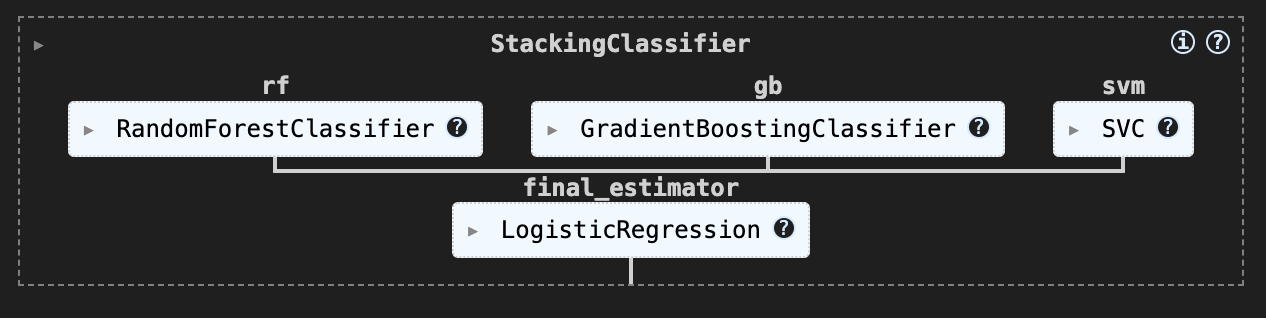

* **Further improvements (if possible):**

* HyperParameter Tuning using Grid/Random Search
* Couldnt accomplish this as each stacked model training took ~35mins on local
* so in theory it would take ~1200 mins to tune parameters

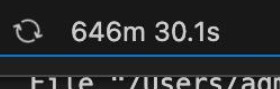

* **Errors that persist**

* Noise in data inconsistent data splitting of train/test as some categories are not present in train but are being tested.

#### Prediction

In [22]:
y_pred = stacking_model.predict(X_encoded_test)

In [23]:
predictions_df = pd.DataFrame({
    'ID': test['ID'],
    'Prediction':y_pred
})

predictions_df.to_csv('submission_stacked.csv', index=False)

print("Predictions saved to submission.csv")

Predictions saved to submission.csv


#### Results

F1 Score: 0.9976540  

(on 33% of test data)